In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [14]:
try:
        data = pd.read_csv("train.csv")
        print(data.describe(),"\n")
except Exception as e:
        print("Error! data not  found.")

            pixel_0      pixel_1       pixel_2       pixel_3       pixel_4  \
count  50000.000000  50000.00000  50000.000000  50000.000000  50000.000000   
mean     130.710740    130.14036    131.050440    131.568860    132.184700   
std       73.412873     72.44259     72.240546     72.016555     71.714551   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%       71.000000     71.00000     73.000000     73.000000     75.000000   
50%      128.000000    127.00000    129.000000    130.000000    130.000000   
75%      189.000000    188.00000    188.000000    188.000000    189.000000   
max      255.000000    255.00000    255.000000    255.000000    255.000000   

            pixel_5       pixel_6       pixel_7       pixel_8      pixel_9  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.00000   
mean     132.851840    133.371540    133.890920    134.485040    134.93260   
std       71.537505     71.353558     71.281237     71.071698  

In [15]:
X = data.drop(columns=['label'])
y = data['label']
y

0        6
1        9
2        9
3        4
4        1
        ..
49995    2
49996    6
49997    9
49998    1
49999    1
Name: label, Length: 50000, dtype: int64

In [16]:
def check_missing_values():
    missing = X.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(missing)
    else:
        print("\n No Missing Data \n")

def detect_outliers(z_thresh=3.29):
    for col in X.columns:
        if pd.api.types.is_numeric_dtype(X[col]):
            z_scores = zscore(X[col])
            outliers = (abs(z_scores) > z_thresh)
            num_outliers = outliers.sum()
            # rint(f"col '{col}': {num_outliers} outlier found.")
            #filtered_data = data[np.abs(z_scores) <= z_thresh]
def normal(X):
    return X.reshape(X.shape[0], -1).astype(np.float32) / 255.0

def plot_distributions():
    for col in X_train.columns:
        if pd.api.types.is_numeric_dtype(X_train[col]):
            plt.figure(figsize=(6,4))
            sns.histplot(X_train[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()
        else:
          print("\n",col, "is not numeric")

In [17]:
X = X.to_numpy().reshape(X.shape[0], -1)
y = y.to_numpy()
X = normal(X)
X

array([[0.23137255, 0.16862746, 0.19607843, ..., 0.54901963, 0.32941177,
        0.28235295],
       [0.6039216 , 0.49411765, 0.4117647 , ..., 0.54509807, 0.5568628 ,
        0.5647059 ],
       [1.        , 0.99215686, 0.99215686, ..., 0.3254902 , 0.3254902 ,
        0.32941177],
       ...,
       [0.13725491, 0.15686275, 0.16470589, ..., 0.3019608 , 0.25882354,
        0.19607843],
       [0.7411765 , 0.7294118 , 0.7254902 , ..., 0.6627451 , 0.67058825,
        0.67058825],
       [0.8980392 , 0.9254902 , 0.91764706, ..., 0.6784314 , 0.63529414,
        0.6313726 ]], dtype=float32)

In [18]:
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

In [27]:
y = one_hot_encode(y_train, num_classes=10)


In [28]:
X_train, X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
)
print(X_train)

[[0.13333334 0.14509805 0.17254902 ... 0.19215687 0.1882353  0.22745098]
 [0.35686275 0.37254903 0.36078432 ... 0.2901961  0.4745098  0.5254902 ]
 [0.8156863  0.7764706  0.6431373  ... 0.6392157  0.64705884 0.6156863 ]
 ...
 [0.41960785 0.49803922 0.45882353 ... 0.13333334 0.13333334 0.13333334]
 [1.         1.         1.         ... 0.21960784 0.23137255 0.23921569]
 [0.73333335 0.77254903 0.78431374 ... 0.37254903 0.40392157 0.41568628]]


In [29]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [30]:
def sigmoid_activation_function(z):
        return sigmoid(z) * (1 - sigmoid(z))

In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [31]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [37]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    if len(y_pred.shape) == 1:
        y_pred = y_pred.reshape(-1, 1)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

In [50]:
def forward(X, W1, b1, W2, b2):
    
    z1 = np.dot(X, W1) + b1
    A1 = sigmoid(z1)
    
    z2 = np.dot(A1, W2) + b2
    A2 = softmax(z2)
    # A2 = A2.reshape(-1, 1)
    
    return z1, A1, z2, A2
    
def compute_loss(y_true, y_pred):
        return binary_cross_entropy(y, y_pred)

def backward(X, y, Z1, A1, Z2, A2, W1, W2, lr):
    
    m = X.shape[0]
    

    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * A1 * (1 - A1) 
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2


def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1, b1, W2, b2

    return W1, b1, W2, b2
def params(input_dim, hidden_dim = 64, output_dim=10):
    W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2./input_dim)
    b1 = np.zeros((1, hidden_dim))
    
    W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(1./hidden_dim)
    b2 = np.zeros((1, output_dim))
    
    return W1, b1, W2, b2

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) 
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


def train(X, y, X_test, y_test, epochs=100, lr=0.1, hidden_dim=64, output_dim=10):
    input_dim = X_train.shape[1]
    W1, b1, W2, b2 = params(input_dim, hidden_dim, output_dim)
    
    history = {
        'train_loss': [],
        'test_loss': [],
        'accuracy': []
    }
    
    for epoch in range(epochs):
        # Forward pass (train)
        Z1, A1, Z2, A2 = forward(X_train, W1, b1, W2, b2)
        train_loss = binary_cross_entropy(y_train, A2)
        
        # Backward pass
        dW1, db1, dW2, db2 = backward(X_train, y_train, Z1, A1, Z2, A2, W1, W2, lr)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        # # Evaluation on test set
        # #y_pred_test = forward(X_test, y_test, W, b)
        # test_loss = 0# binary_cross_entropy(y_test, y_pred_test)
        # accuracy = 0#np.mean((y_pred_test >= 0.5).astype(int) == y_test)
        
        # Store history
        history['train_loss'].append(train_loss)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch:3d} | Train Loss: {train_loss}")
    
    return W1, b1, W2, b2, history
        
         

In [47]:
def predict(X_test, W1, b1, W2, b2):
    _, _, _, A2 = forward(X_test, W1, b1, W2, b2)
    return (A2 >= 0.5).astype(int)


In [48]:
def evaluate(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    from sklearn.metrics import classification_report
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    print(classification_report(y_true_labels, y_pred_labels))
    print(f"Confusion Matrix:\nTP: {TP}, FP: {FP}\nFN: {FN}, TN: {TN}")
    print(f"F1-score: {f1:.4f}")


In [61]:
W1, b1, W2, b2, h= train(X_train, y_train, X_test, y_test, 2000, 0.1)

Epoch   0 | Train Loss: 2.5058762812585544
Epoch  10 | Train Loss: 2.270420476906492
Epoch  20 | Train Loss: 2.2393321032965927
Epoch  30 | Train Loss: 2.21004840216813
Epoch  40 | Train Loss: 2.1831077795212885
Epoch  50 | Train Loss: 2.1579739047478714
Epoch  60 | Train Loss: 2.1344086658516033
Epoch  70 | Train Loss: 2.112360665677736
Epoch  80 | Train Loss: 2.0918379674820713
Epoch  90 | Train Loss: 2.072846694604499
Epoch 100 | Train Loss: 2.0553567305547067
Epoch 110 | Train Loss: 2.039297119385927
Epoch 120 | Train Loss: 2.0245671633841127
Epoch 130 | Train Loss: 2.011050827964946
Epoch 140 | Train Loss: 1.998628515778542
Epoch 150 | Train Loss: 1.9871849845507976
Epoch 160 | Train Loss: 1.97661397397537
Epoch 170 | Train Loss: 1.966820352751582
Epoch 180 | Train Loss: 1.9577205261318658
Epoch 190 | Train Loss: 1.9492417759103549
Epoch 200 | Train Loss: 1.9413210760638908
Epoch 210 | Train Loss: 1.933903748282267
Epoch 220 | Train Loss: 1.9269421595588068
Epoch 230 | Train Loss:

In [62]:
y_pred = predict(X_test, W1, b1, W2, b2)

In [63]:
evaluate(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.11      0.91      0.19       973
           1       0.73      0.25      0.37       979
           2       0.75      0.00      0.01      1030
           3       0.57      0.01      0.02      1023
           4       0.64      0.03      0.05       933
           5       0.74      0.06      0.11      1015
           6       0.59      0.11      0.19       996
           7       0.70      0.17      0.28       994
           8       0.74      0.29      0.42      1017
           9       0.68      0.21      0.32      1040

    accuracy                           0.20     10000
   macro avg       0.63      0.20      0.20     10000
weighted avg       0.63      0.20      0.20     10000

Confusion Matrix:
TP: 1339, FP: 564
FN: 8661, TN: 89436
F1-score: 0.2250


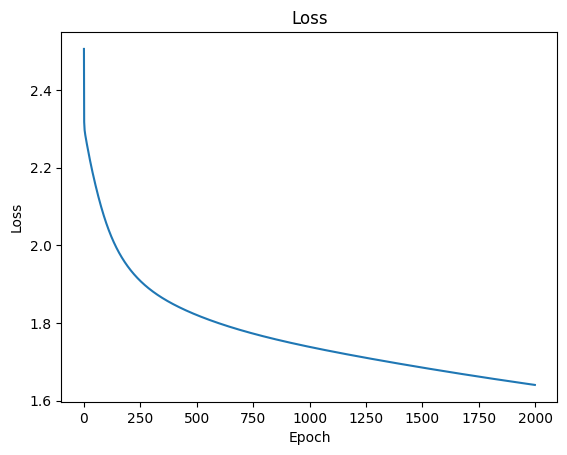

In [64]:
plt.plot(h['train_loss'], label='Train Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()